In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pymatgen.io.cif import CifParser
from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.core.composition import Composition
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError

m = MPRester("HO1VbgbPQuOTRM1fZLEL")

results = m.query({"elements": {"$all" : ["C"]}, 'nelements':1}, properties=['cif','band_gap', 'volume', 'density', 'energy', 'structure' ])  #all materials that composed only of carbon atoms
print(len(results))

58


In [4]:
mean_distance_matrix= []
max_distance_matrix = []
min_distance_matrix = []
std_distance_matrix = []

band_gaps = []
volume = []
density = []
energy = []


for i in results:
    cif = i['cif']
    bg = i['band_gap']
    vol = i['volume']
    dense = i['density']
    eg = i['energy']
    
    
    
    cifFile = results[0]['cif']
    parser = CifParser.from_string(cifFile)
    struct = parser.get_structures()
    struct = struct[0]
    
    mean_distance_matrix += [np.mean(struct.distance_matrix)]
    max_distance_matrix += [np.max(struct.distance_matrix)]
    min_distance_matrix += [np.min(struct.distance_matrix)]
    std_distance_matrix += [np.std(struct.distance_matrix)]
        
    
    band_gaps += [bg]
    volume += [vol]
    density += [dense]
    energy += [eg]

C:\Users\Koala\anaconda3\lib\site-packages\pymatgen\io\cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


In [6]:
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame({"mean_distance_matrix": mean_distance_matrix,
                    "max_distance_matrix": max_distance_matrix,
                    "min_distance_matrix": min_distance_matrix,
                    "std_distance_matrix": std_distance_matrix, 
                    'band_gap':band_gaps,
                    'volume': volume, 
                    'density':density, 
                    'energy':energy})
df

,mean_distance_matrix,max_distance_matrix,min_distance_matrix,std_distance_matrix,band_gap,volume,density,energy
0,3.375014,6.385234,0.0,1.794341,4.4270,68.503985,3.493678,-109.010070
1,3.375014,6.385234,0.0,1.794341,0.0000,26.299026,1.516728,-13.242008
2,3.375014,6.385234,0.0,1.794341,0.1062,1170.354117,2.044944,-1023.523512
3,3.375014,6.385234,0.0,1.794341,2.7785,44.865636,3.556261,-67.149530
4,3.375014,6.385234,0.0,1.794341,3.5883,46.927558,3.400004,-71.687017
5,3.375014,6.385234,0.0,1.794341,0.0853,1190.353228,1.675489,-823.297346
6,3.375014,6.385234,0.0,1.794341,0.0000,26.538402,3.006095,-35.161012
7,3.375014,6.385234,0.0,1.794341,0.0000,84.514610,1.887885,-66.269265
8,3.375014,6.385234,0.0,1.794341,0.0000,8.195090,2.433681,-6.591845
9,3.375014,6.385234,0.0,1.794341,2.0672,484.879254,1.151707,-216.280294


In [7]:
res = m.query({"elements": {"$all" : ["C"]}, 'nelements':1}, properties=['structure' ])  #all materials that composed only of carbon atoms
df2 = pd.DataFrame(res)
df3 = pd.concat([df, df2], axis = 1)

In [8]:
from matminer.featurizers.structure.misc import XRDPowderPattern
xrd = XRDPowderPattern()
xrd.feature_labels()

df3 = xrd.featurize_dataframe(df3, "structure")
df3

XRDPowderPattern:   0%|          | 0/58 [00:00<?, ?it/s]

,mean_distance_matrix,max_distance_matrix,min_distance_matrix,std_distance_matrix,band_gap,volume,density,energy,structure,xrd_0,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,3.375014,6.385234,0.0,1.794341,4.4270,68.503985,3.493678,-109.010070,"[[ 1.261126 -0.72811279 4.41230334] C, [ 1....",6.620480e-322,...,6.407211e-03,1.193596e-02,9.641180e-03,3.376664e-03,5.127791e-04,3.376427e-05,9.639827e-07,1.193344e-08,6.405412e-11,1.490778e-13
1,3.375014,6.385234,0.0,1.794341,0.0000,26.299026,1.516728,-13.242008,"[[0.76289546 0. 7.40990775] C, [1.5404...",2.980886e-95,...,9.083394e-05,1.974943e-06,1.119981e-08,1.656594e-11,6.391036e-15,6.430961e-19,1.687835e-23,1.155404e-28,2.062942e-34,9.607047e-41
2,3.375014,6.385234,0.0,1.794341,0.1062,1170.354117,2.044944,-1023.523512,"[[4.559048 2.57875261 3.62098509] C, [4.5590...",5.210033e-78,...,2.148106e-282,1.331059e-308,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,3.375014,6.385234,0.0,1.794341,2.7785,44.865636,3.556261,-67.149530,"[[ 0.42143899 2.65990899 -0.42143899] C, [-0....",1.596699e-216,...,2.606463e-05,3.600635e-04,2.706236e-03,1.106652e-02,2.462158e-02,2.980436e-02,1.962920e-02,7.033714e-03,1.371279e-03,1.454541e-04
4,3.375014,6.385234,0.0,1.794341,3.5883,46.927558,3.400004,-71.687017,"[[3.46732536 1.46166041 0. ] C, [ 0.787...",2.172581e-72,...,3.816275e-03,4.994336e-03,3.263727e-03,1.193926e-03,3.178016e-04,3.465920e-04,1.032623e-03,1.597258e-03,1.145496e-03,3.798131e-04
5,3.375014,6.385234,0.0,1.794341,0.0853,1190.353228,1.675489,-823.297346,"[[7.52983201 6.30191241 0.6833079 ] C, [8.4740...",4.130592e-81,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,3.375014,6.385234,0.0,1.794341,0.0000,26.538402,3.006095,-35.161012,"[[ 1.350784 -1.48151603 1.2560005 ] C, [ 1....",2.915430e-64,...,2.499093e-03,3.517976e-03,4.331552e-03,7.172949e-03,1.163158e-02,1.229378e-02,7.653580e-03,2.763203e-03,5.772725e-04,6.976496e-05
7,3.375014,6.385234,0.0,1.794341,0.0000,84.514610,1.887885,-66.269265,"[[ 1.228789 -1.372186 0.68277622] C, [2.4...",4.455696e-61,...,3.278218e-11,1.351048e-14,1.402715e-18,3.668884e-23,2.417487e-28,4.012914e-34,1.678113e-40,1.767862e-47,4.691820e-55,3.136894e-63
8,3.375014,6.385234,0.0,1.794341,0.0000,8.195090,2.433681,-6.591845,[[0. 0. 0.] C],4.796909e-107,...,1.092406e-05,4.589267e-07,1.063750e-08,1.360419e-10,9.599365e-13,3.737226e-15,8.027736e-18,9.514232e-21,6.221445e-24,2.244635e-27
9,3.375014,6.385234,0.0,1.794341,2.0672,484.879254,1.151707,-216.280294,"[[2.43045611 8.0770378 6.39587916] C, [5.4674...",1.145491e-56,...,1.717170e-24,2.747406e-32,2.567967e-41,1.402210e-51,4.472945e-63,8.335490e-76,9.074563e-90,5.771349e-105,2.144302e-121,4.654270e-139


In [75]:
# from matminer.featurizers.conversions import StructureToComposition
# df = StructureToComposition().featurize_dataframe(df, "structure")
# df

In [9]:
y = df3['band_gap'].values
print(y)

[4.4270e+00 0.0000e+00 1.0620e-01 2.7785e+00 3.5883e+00 8.5300e-02
 0.0000e+00 0.0000e+00 0.0000e+00 2.0672e+00 0.0000e+00 2.6070e-01
 7.9700e-02 4.1200e-02 1.1035e+00 2.6076e+00 1.5470e+00 0.0000e+00
 6.0000e-04 4.5245e+00 9.6690e-01 3.2084e+00 4.3859e+00 0.0000e+00
 1.0000e-04 4.3050e-01 1.0000e-04 0.0000e+00 3.0410e-01 4.3387e+00
 1.0000e-04 3.5408e+00 1.8637e+00 0.0000e+00 0.0000e+00 3.3395e+00
 9.1000e-01 4.1975e+00 2.0000e-04 0.0000e+00 6.5660e-01 1.3517e+00
 7.1320e-01 1.7730e+00 0.0000e+00 1.0300e-02 1.2370e+00 6.0500e-02
 0.0000e+00 2.6904e+00 1.2310e-01 4.4083e+00 0.0000e+00 2.7039e+00
 0.0000e+00 1.8750e-01 4.3282e+00 0.0000e+00]


In [10]:
X = df3.drop(["band_gap", "structure"], axis = 1)
print(X)

    mean_distance_matrix  max_distance_matrix  min_distance_matrix  \
0               3.375014             6.385234                  0.0   
1               3.375014             6.385234                  0.0   
2               3.375014             6.385234                  0.0   
3               3.375014             6.385234                  0.0   
4               3.375014             6.385234                  0.0   
5               3.375014             6.385234                  0.0   
6               3.375014             6.385234                  0.0   
7               3.375014             6.385234                  0.0   
8               3.375014             6.385234                  0.0   
9               3.375014             6.385234                  0.0   
10              3.375014             6.385234                  0.0   
11              3.375014             6.385234                  0.0   
12              3.375014             6.385234                  0.0   
13              3.37

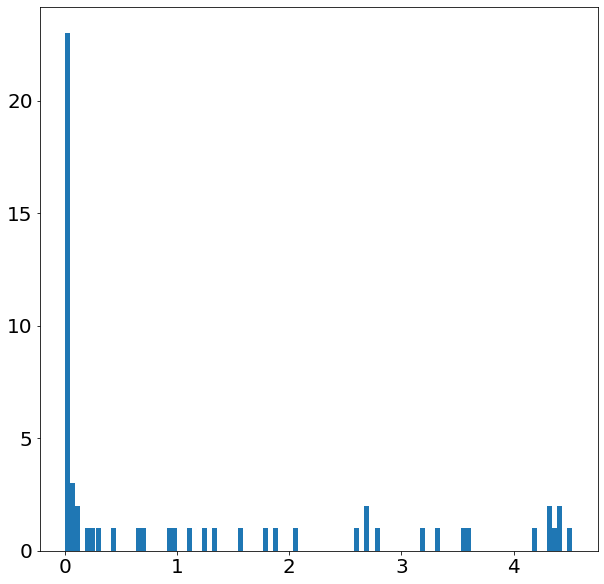

In [11]:
plt.rcParams.update({'font.size' : 20})
plt.figure(figsize=(10,10))
plt.hist(y, bins=100)
plt.savefig('Histogram_PDF', bbox_inches='tight')

In [13]:
#split dataset into training and test sets using 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=None)

#standardize the descriptors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

RF MAE	0.6396570000000005

RF R2	0.5029266300208144

RF RMSE = 0.803 ev/Atom

XGBOOST MAE	0.5771475689052915

XGBOOST R2	0.3656947289304411

XGBOOST RMSE = 0.907 ev/Atom



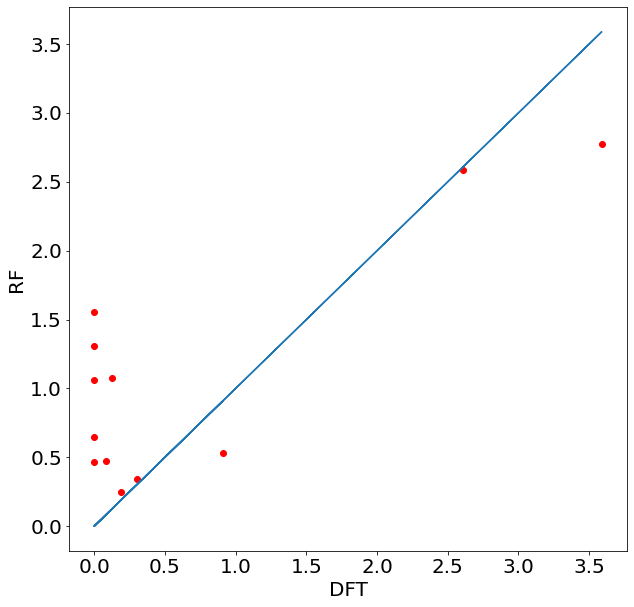

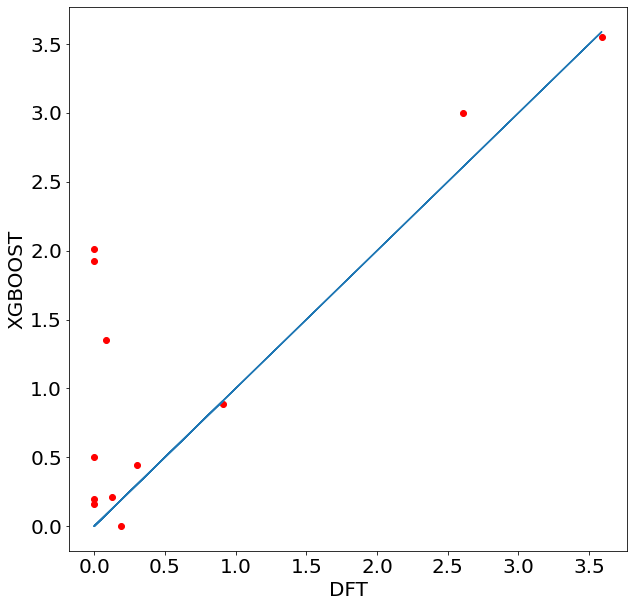

In [23]:
#ML Using Random Forest and XGBoost
#Statistical analysis of errors using MAE, R2, and MSE
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


#------------RF--------------#
regr = RandomForestRegressor(n_estimators=100, max_depth=400, random_state=1)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('RF MAE\t' + str(mean_absolute_error(y_test, y_predicted))+'\n')
print('RF R2\t' + str(r2_score(y_test, y_predicted))+ '\n')
mse = mean_squared_error(y_test, y_predicted)
print('RF RMSE = {:.3f} ev/Atom'.format(np.sqrt(mse)) + '\n')


xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RF')
plt.xlabel('DFT')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')

#---------------XGBOOST----------------------#
regr = XGBRegressor(objective='reg:squarederror', max_depth=10, n_estimators=100)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('XGBOOST MAE\t' + str(mean_absolute_error(y_test, y_predicted))+'\n')
print('XGBOOST R2\t' + str(r2_score(y_test, y_predicted))+ '\n')
mse = mean_squared_error(y_test, y_predicted)
print('XGBOOST RMSE = {:.3f} ev/Atom'.format(np.sqrt(mse))+ '\n')

xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT')
plt.savefig('XGBOOST_Correlation_Test', bbox_inches='tight')


# y_predicted = regr.predict(X)
# plt.plot(y, 'ro')
# plt.plot(y_predicted,'bo')